# Simple Linear Regression Ordinary Least Squares Methodologies with Python

In [109]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Matrix Math for correlation

In [110]:
XA=np.array([16.1,18.2,19.3,20.4])
XB=np.array([36.7,37.1,37.7,42.1])

In [111]:
np.cov(XA,XB)

array([[3.36666667, 3.64666667],
       [3.64666667, 6.25333333]])

In [112]:
np.corrcoef(XA,XB)

array([[1.        , 0.79476772],
       [0.79476772, 1.        ]])

In [113]:
# centering 
XAmc=XA-np.mean(XA)
XAmc

array([-2.4, -0.3,  0.8,  1.9])

In [114]:
# mean centered and scaled
XAmcs=(XA-np.mean(XA))/np.std(XA,ddof=1)
XAmcs

array([-1.30801036, -0.16350129,  0.43600345,  1.0355082 ])

In [115]:
np.std(XA,ddof=1)

1.834847859269717

Using mean centered data

In [116]:
X1=[-2.4,-0.3,0.8,1.9]
X2=[-1.7,-1.3,-0.7,3.7]

In [117]:
np.var(X1,ddof=1)

3.3666666666666667

In [118]:
np.var(X2,ddof=1)

6.253333333333334

In [119]:
np.cov(X1,X2)

array([[3.36666667, 3.64666667],
       [3.64666667, 6.25333333]])

In [120]:
np.corrcoef(X1,X2)

array([[1.        , 0.79476772],
       [0.79476772, 1.        ]])

In [121]:
X1=np.asarray(X1)
X1

array([-2.4, -0.3,  0.8,  1.9])

In [122]:
sum(X1)

2.220446049250313e-16

In [123]:
X2=np.asarray(X2)

In [124]:
X2.shape

(4,)

In [125]:
X_matrix=pd.DataFrame(X1,columns=["X1"])
X_matrix["X2"]=X2.tolist()
X_matrix

,X1,X2
0,-2.4,-1.7
1,-0.3,-1.3
2,0.8,-0.7
3,1.9,3.7


In [126]:
Xt=np.transpose(X_matrix)
Xt

,0,1,2,3
X1,-2.4,-0.3,0.8,1.9
X2,-1.7,-1.3,-0.7,3.7


In [127]:
X_matrix.shape

(4, 2)

In [128]:
XtX=((Xt.dot(X_matrix)))
XtX

,X1,X2
X1,10.10,10.94
X2,10.94,18.76


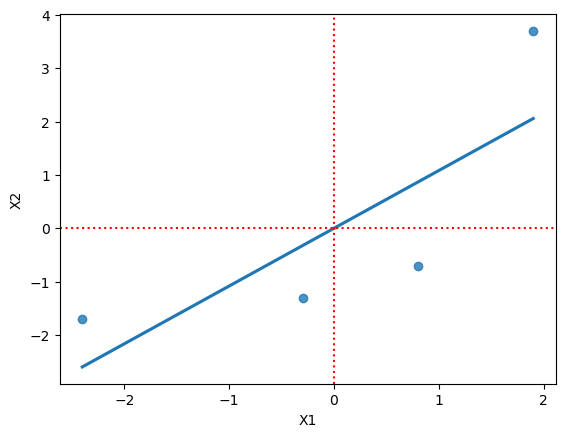

In [129]:
import seaborn as sns
plotX=sns.regplot(x='X1',y='X2',data=X_matrix,ci=None)
plotX.axvline(x=np.mean(X1),c="r",linestyle=":")
plotX.axhline(y=np.mean(X2),c="r",linestyle=":")

In [130]:
X1=np.array([16.1,18.2,19.3,20.4])
Y=np.array([36.7,37.1,37.7,42.1])

In [131]:
Xdev=X1-np.mean(X1)
Xdev

array([-2.4, -0.3,  0.8,  1.9])

In [132]:
np.mean(X1)

18.5

In [133]:
Ydev=Y-np.mean(Y)
Ydev

array([-1.7, -1.3, -0.7,  3.7])

In [134]:
np.mean(Y)

38.400000000000006

In [135]:
Xdev*Ydev

array([ 4.08,  0.39, -0.56,  7.03])

In [136]:
np.square(Xdev)

array([5.76, 0.09, 0.64, 3.61])

In [137]:
np.square(Ydev)

array([ 2.89,  1.69,  0.49, 13.69])

In [138]:
np.sum(np.square(Ydev))

18.759999999999994

In [139]:
np.sum(np.square(Xdev))

10.09999999999999

In [140]:
np.sum(Xdev*Ydev)

10.93999999999999

In [141]:
np.corrcoef(X1,Y)

array([[1.        , 0.79476772],
       [0.79476772, 1.        ]])

In [142]:
np.var(Y,ddof=1)

6.253333333333331

In [143]:
10.94/10.10

1.0831683168316832

In [144]:
X_df=pd.DataFrame(X1,columns=["X1"])
X_df["Y"]=Y.tolist()
X_df

,X1,Y
0,16.1,36.7
1,18.2,37.1
2,19.3,37.7
3,20.4,42.1


In [145]:
from statsmodels.formula.api import ols

model = ols("Y ~ X1", data=X_df)
results = model.fit()
results.summary2()

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.447  
Dependent Variable: Y                AIC:                17.5383
Date:               2023-03-01 12:20 BIC:                16.3109
No. Observations:   4                Log-Likelihood:     -6.7691
Df Model:           1                F-statistic:        3.430  
Df Residuals:       2                Prob (F-statistic): 0.205  
R-squared:          0.632            Scale:              3.4551 
-----------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
-----------------------------------------------------------------
Intercept    18.3614   10.8601  1.6907  0.2330  -28.3660  65.0888
X1            1.0832    0.5849  1.8519  0.2052   -1.4334   3.5997
----------------------------------------------------------------
Omnibus:               nan         Durbin-Watson:          2.049
Prob(Omnibus):         nan         Jarque-Bera (JB):       0.515
Skew:                  0.042       Prob(JB):               0.773
Kurtosis:              1.244       Condition No.:          218  
================================================================

"""

C:\Users\carol\AppData\Local\Temp\ipykernel_27608\1943194179.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plotX.grid(b=True, which='major', color='black', linewidth=0.55)
C:\Users\carol\AppData\Local\Temp\ipykernel_27608\1943194179.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plotX.grid(b=True, which='minor', color='black', linewidth=0.55)


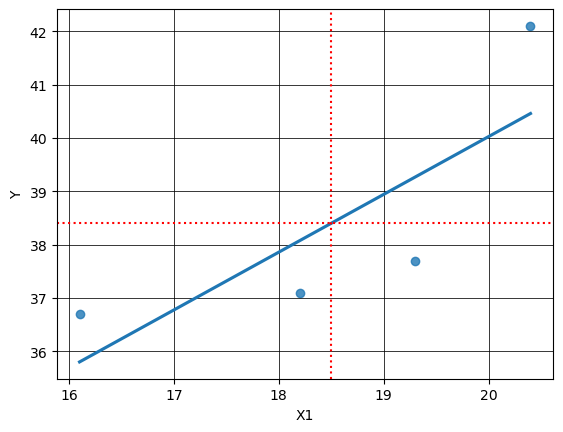

In [146]:
import seaborn as sns
plotX=sns.regplot(x='X1',y='Y',data=X_df,ci=None)
plotX.axvline(x=np.mean(X1),c="r",linestyle=":")
plotX.axhline(y=np.mean(Y),c="r",linestyle=":")
plotX.grid(b=True, which='major', color='black', linewidth=0.55)
plotX.grid(b=True, which='minor', color='black', linewidth=0.55)

C:\Users\carol\AppData\Local\Temp\ipykernel_27608\4205979608.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plotX.grid(b=True, which='major', color='black', linewidth=0.55)
C:\Users\carol\AppData\Local\Temp\ipykernel_27608\4205979608.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plotX.grid(b=True, which='minor', color='black', linewidth=0.55)


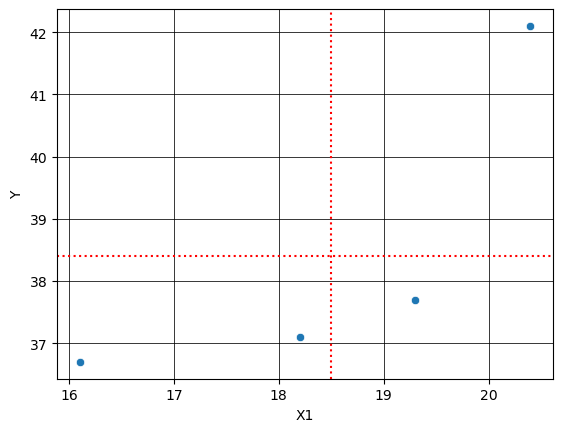

In [147]:
import seaborn as sns
plotX=sns.scatterplot(x='X1',y='Y',data=X_df)
plotX.axvline(x=np.mean(X1),c="r",linestyle=":")
plotX.axhline(y=np.mean(Y),c="r",linestyle=":")
plotX.grid(b=True, which='major', color='black', linewidth=0.55)
plotX.grid(b=True, which='minor', color='black', linewidth=0.55)

In [148]:
np.mean(Y) - 1.0832 * np.mean(X1)

18.36080000000001

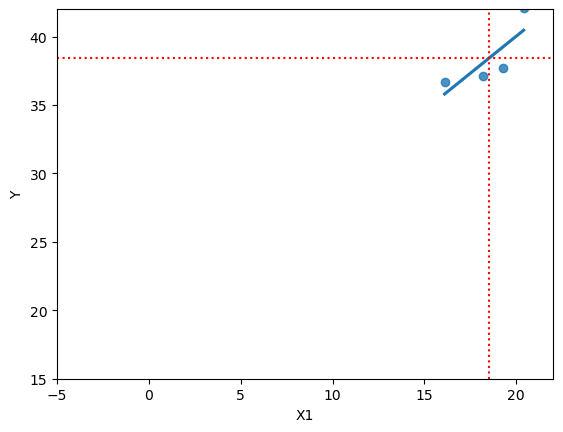

In [149]:
plotX=sns.regplot(x='X1',y='Y',data=X_df,ci=None)
plotX.set_xlim(-5,22)
plotX.set_ylim(15,42)
plotX.axvline(x=np.mean(X1),c="r",linestyle=":")
plotX.axhline(y=np.mean(Y),c="r",linestyle=":")

# OLS regression and matrix formulation

In [150]:
X=[-2.4,-0.3,0.8,1.9]
Y=[-1.7,-1.3,-0.7,3.7]

In [151]:
X=np.asarray(X)
X

array([-2.4, -0.3,  0.8,  1.9])

In [152]:
Y=np.asarray(Y)
X.shape

(4,)

In [153]:
X_bias=np.ones((4,1)) # m is the number of records in the dataset
X_bias

array([[1.],
       [1.],
       [1.],
       [1.]])

In [154]:
X=np.reshape(X,(4,1))
Y=np.reshape(Y,(4,1))
X

array([[-2.4],
       [-0.3],
       [ 0.8],
       [ 1.9]])

In [155]:
newX=np.append(X_bias,X,axis=1)
newX

array([[ 1. , -2.4],
       [ 1. , -0.3],
       [ 1. ,  0.8],
       [ 1. ,  1.9]])

In [156]:
X_transpose=np.transpose(newX)
X_transpose

array([[ 1. ,  1. ,  1. ,  1. ],
       [-2.4, -0.3,  0.8,  1.9]])

In [157]:
X_transpose.shape

(2, 4)

In [158]:
XtX=((X_transpose.dot(newX)))
XtX

array([[4.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.01000000e+01]])

In [159]:
XtX_Inverse=np.linalg.inv(XtX)
XtX_Inverse

array([[ 2.50000000e-01, -5.49615359e-18],
       [-5.49615359e-18,  9.90099010e-02]])

In [160]:
XtY=((X_transpose.dot(Y)))
XtY

array([[ 0.  ],
       [10.94]])

In [161]:
XtX_Inverse.dot(XtY)

array([[-6.01279202e-17],
       [ 1.08316832e+00]])

In [162]:
Y=pd.Series([-1.7,-1.3,-0.7,3.7])
X_dfA=pd.DataFrame(newX,columns=["X1","X"])
X_dfA["Y"]=Y.tolist()
X_dfA

,X1,X,Y
0,1.0,-2.4,-1.7
1,1.0,-0.3,-1.3
2,1.0,0.8,-0.7
3,1.0,1.9,3.7


In [163]:
from statsmodels.formula.api import ols

model2=ols('Y~X',data=X_dfA)
results2=model2.fit()
print(results2.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.447  
Dependent Variable: Y                AIC:                17.5383
Date:               2023-03-01 12:21 BIC:                16.3109
No. Observations:   4                Log-Likelihood:     -6.7691
Df Model:           1                F-statistic:        3.430  
Df Residuals:       2                Prob (F-statistic): 0.205  
R-squared:          0.632            Scale:              3.4551 
------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
------------------------------------------------------------------
Intercept   0.0000     0.9294   0.0000   1.0000   -3.9988   3.9988
X           1.0832     0.5849   1.8519   0.2052   -1.4334   3.5997
----------------------------------------------------------------
Omnibus:               nan         Durbin-Watson:          2.049
Prob(Omnibus):         nan      

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [164]:
from statsmodels.stats.anova import anova_lm
anova_results2 = anova_lm(results2)
print(anova_results2)

           df     sum_sq    mean_sq         F    PR(>F)
X         1.0  11.849861  11.849861  3.429703  0.205232
Residual  2.0   6.910139   3.455069       NaN       NaN


In [165]:
#the mean square error
y_hat=1.0832*X
y_hat

array([[-2.59968],
       [-0.32496],
       [ 0.86656],
       [ 2.05808]])

In [166]:
errors=([-1.7-(-2.60),-1.3-(-0.33),-0.7-(0.87),3.7-(2.06)])
errors

[0.9000000000000001, -0.97, -1.5699999999999998, 1.6400000000000001]

In [167]:
# These errors can be found using the 
# resid attribute of the results2 object
results2.resid

0    0.899604
1   -0.975050
2   -1.566535
3    1.641980
dtype: float64

In [168]:
np.sum(np.square(errors))

6.9054

In [169]:
# MSE is the sum of the squares of the error divided by the dof
# dof = (n-k-1) = (sample size - number of predictors -1) 
#  = 4-1-1 = 2
np.sum(np.square(errors)) / 2

3.4527

The standard error of the beta coefficient is equal to the square root (of the diagonal of the inverse of the XtX matrix * the square of the standard error of the regression (which is the mean squared error or the scale)).

In [170]:
# standard error of beta: use the XtX matrix
np.sqrt(3.4551*0.099)

0.5848545973145804

In [171]:
#since this is SLR, we can divide by the SSx
np.sqrt(3.4551/10.10)

0.5848838422378336

In [172]:
1/10.10

0.09900990099009901

The standard error of the regression (=standard error of the estimate =residual standard error) is the model estimate that is analogous to the standard deviation of a sample. It represents the average distance that the observed values fall from the regression line and is a measure of the precision of the model. 

The standard error of the regression is equal to the square root of (the sum of the squares of the residual divided by the dof of the residuals) = square root of the MSE.  

To find the standard error of the beta coefficient, we find the sqrt(MSE divided by the sum of squares of the predictor x). 

This is the same as the standard error of the regression ( = sqrt(SSE/(n-2)) ) divided by ( (the standard deviation of the x sample multiplied by the sqrt(n-1) ) or ( = sqrt(SSx/(n-1)) * sqrt(n-1) ) ) 

The diagonal of the XtX matrix is the sum of squares of x, which we can divide by dof to get the sample variance of x. Square root of the sample variance is the sample std.

This diagonal of the XtX matrix will provide the sum of squares for the x variables.  Since this is a simple linear regression example, we can divide by this value directly to find the SE(beta).  This is the same as multiplying by (1/SSx).

In multiple linear regression, we will not be able to divide like this (you cant divide by a matrix) but you can multiple by the inverse of a matrix.  This is why we will look to matrix math to help in keeping track of the sum of squares for the x variables and have a matrix that holds the inverse of these.  

Other dataset in lecture for squares

In [173]:
X5=np.array([19.11,17.44,21.56,19.9,20.17,19.32,20.53,18.99,20.69,23.04])
Y5=np.array([38.68,36.03,42.64,40.77,39.30,40.31,41.43,40.54,39.73,42.40])

In [174]:
np.cov(X5,Y5)

array([[2.36033889, 2.47050556],
       [2.47050556, 3.72071222]])